In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
### Load Data
data = pd.read_csv('profiles.csv')


In [4]:
### Check Data
print(data.head())


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [5]:
#EDA
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [6]:
#Examine single features (continous)
#AGE
print(data.age.describe())

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64


In [7]:
#Height in Inches
print(data.height.describe())

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64


In [8]:
#Income
print(data.income.describe())

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64


In [9]:
#Examine Discrete Variables
#status


print("number of categories:",data.status.nunique())
print("categories:", data.status.unique())

data.status.value_counts()

number of categories: 5
categories: ['single' 'available' 'seeing someone' 'married' 'unknown']


single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [10]:
#smokes

print("number of categories:",data.smokes.nunique())
print("categories:", data.smokes.unique())

data.smokes.value_counts()

number of categories: 5
categories: ['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']


no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [11]:
#job

print("number of categories:",data.job.nunique())
print("categories:", data.job.unique())

data.job.value_counts()

number of categories: 21
categories: ['transportation' 'hospitality / travel' nan 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical / administrative'
 'construction / craftsmanship' 'rather not say' 'political / government'
 'law / legal services' 'unemployed' 'military' 'retired']


other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [12]:
#pets
print("number of categories:",data.pets.nunique())
print("categories:", data.pets.unique())

data.pets.value_counts()

number of categories: 15
categories: ['likes dogs and likes cats' 'has cats' 'likes cats' nan
 'has dogs and likes cats' 'likes dogs and has cats'
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'likes dogs' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']


likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [13]:
#ethnicity

print("number of categories:",data.ethnicity.nunique())

#likley won't use this as feature


number of categories: 217


In [14]:
#speaks

print("number of categories:",data.speaks.nunique())

#Won't be used for prediction model

number of categories: 7647


In [15]:
#drinks

print("number of categories:",data.drinks.nunique())
print("categories:", data.drinks.unique())

data.drinks.value_counts()

#Will be used for model


number of categories: 6
categories: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']


socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [16]:
#drugs

print("number of categories:",data.drugs.nunique())
print("categories:", data.drugs.unique())

data.drugs.value_counts()

#Will be used for model

number of categories: 3
categories: ['never' 'sometimes' nan 'often']


never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [17]:
#RELIGION
#Clean religion data type
print(data.religion.unique())
print(data.religion.nunique())

data['religionClean'] = data.religion.str.split().str.get(0)
print("number of categories:",data.religionClean.nunique())
print("categories:", data.religionClean.unique())

data.religionClean.value_counts()


['agnosticism and very serious about it'
 'agnosticism but not too serious about it' nan 'atheism' 'christianity'
 'christianity but not too serious about it'
 'atheism and laughing about it' 'christianity and very serious about it'
 'other' 'catholicism' 'catholicism but not too serious about it'
 'catholicism and somewhat serious about it'
 'agnosticism and somewhat serious about it'
 'catholicism and laughing about it' 'agnosticism and laughing about it'
 'agnosticism' 'atheism and somewhat serious about it'
 'buddhism but not too serious about it'
 'other but not too serious about it' 'buddhism'
 'other and laughing about it' 'judaism but not too serious about it'
 'buddhism and laughing about it' 'other and somewhat serious about it'
 'other and very serious about it' 'hinduism but not too serious about it'
 'atheism but not too serious about it' 'judaism'
 'christianity and somewhat serious about it'
 'hinduism and very serious about it' 'atheism and very serious about it'
 'juda

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religionClean, dtype: int64

In [18]:
#orientation

print("number of categories:",data.orientation.nunique())
print("categories:", data.orientation.unique())

data.orientation.value_counts()

number of categories: 3
categories: ['straight' 'bisexual' 'gay']


straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [19]:
#BODY Type
print(data.body_type.unique())
print(data.body_type.nunique())

['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
12


In [20]:
#Clean Zodiac Sign Label (eliminate qualifiers)
print(data.sign.unique())

data['signsCleaned'] = data.sign.str.split().str.get(0)
print("nnumber of categories:",data.signsCleaned.nunique())
print("categories:", data.signsCleaned.unique())

data.signsCleaned.value_counts()

['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t matter'
 'sagi

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

In [21]:
#Placeholder for features to move on to next phase which is preprocessing
'''
age - no
height
body_type
smokes
status
drugs
religion
drinks
sex
pets
job
'''

'\nage - no\nheight\nbody_type\nsmokes\nstatus\ndrugs\nreligion\ndrinks\nsex\npets\njob\n'

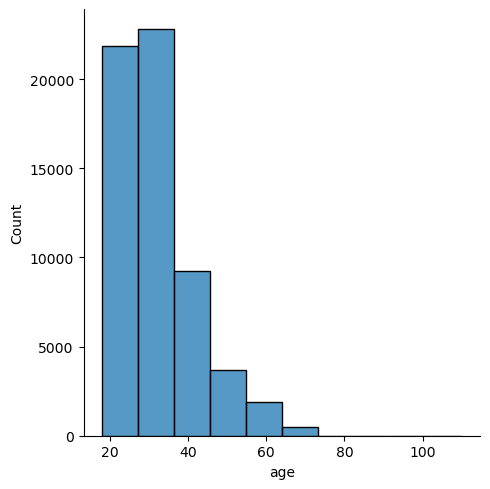

In [22]:
#Using Plots, examine named fields above
#age
sns.displot(data.age, bins=10)
plt.show()
#Most of the ages fall around 20s and 30s

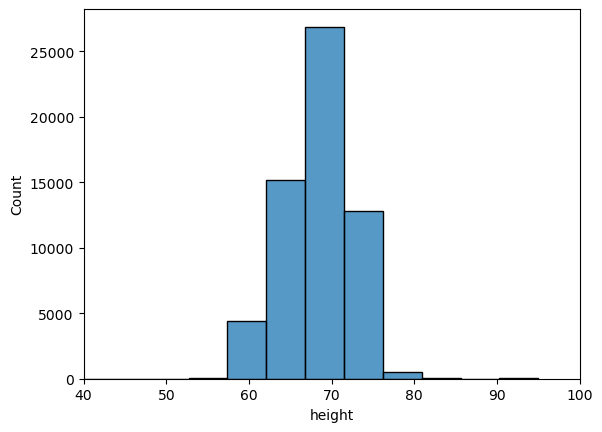

In [23]:
#height
fig, ax = plt.subplots()
sns.histplot(data.height, bins=20,kde=False,ax=ax)
ax.set_xlim(40,100)
plt.show()

<Axes: xlabel='count', ylabel='body_type'>

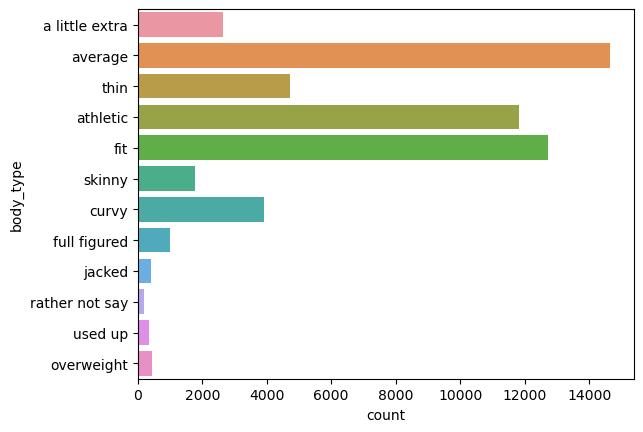

In [24]:
#body_type
sns.countplot(data=data, y="body_type")

<Axes: xlabel='count', ylabel='smokes'>

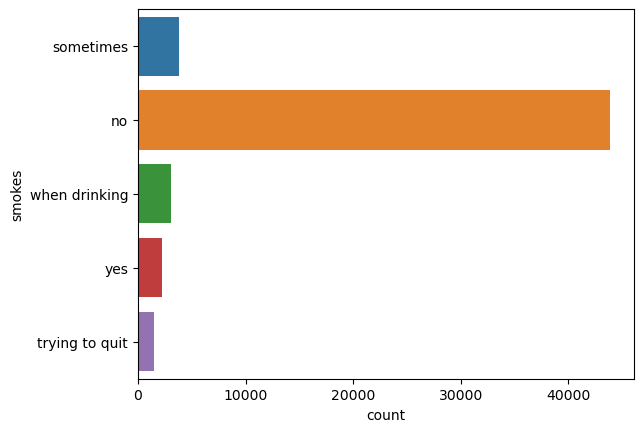

In [25]:
#smokes
sns.countplot(data=data, y="smokes")

<Axes: xlabel='count', ylabel='status'>

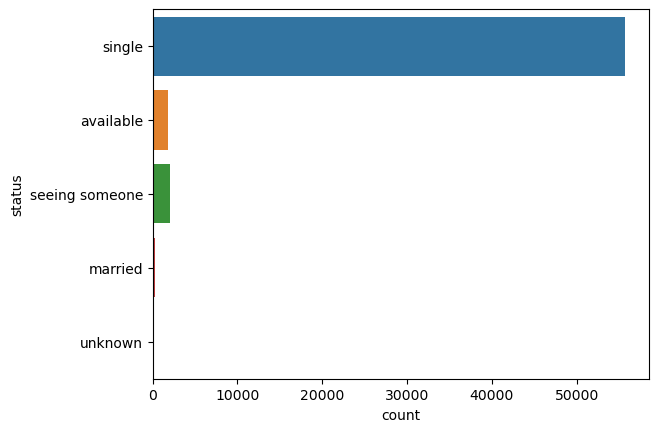

In [26]:
#status
sns.countplot(data=data, y="status")

<Axes: xlabel='count', ylabel='drugs'>

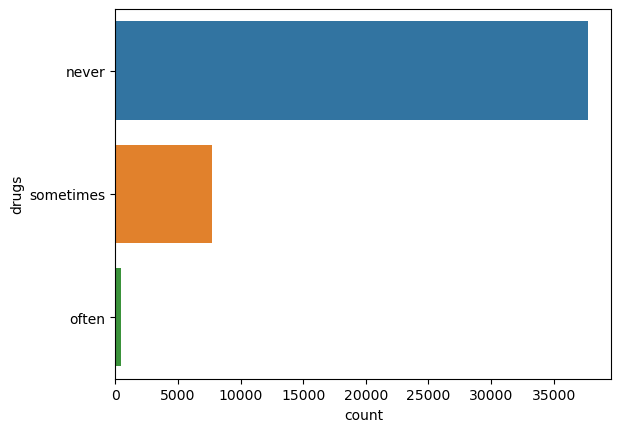

In [27]:
#drugs
sns.countplot(data=data, y="drugs")

<Axes: xlabel='count', ylabel='religionClean'>

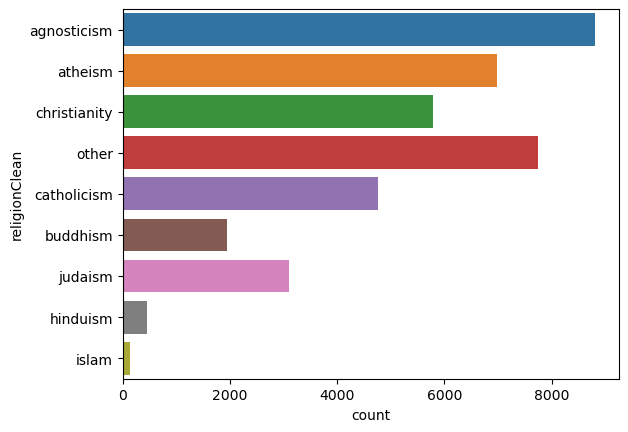

In [28]:
#religion
sns.countplot(data=data, y="religionClean")

<Axes: xlabel='count', ylabel='drinks'>

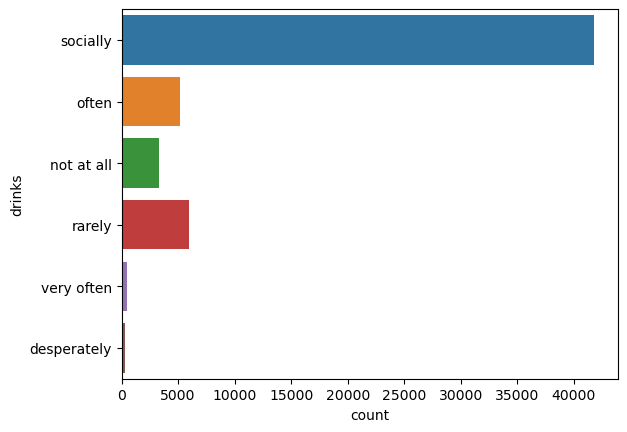

In [29]:
#drinks
sns.countplot(data=data, y="drinks")

<Axes: xlabel='count', ylabel='sex'>

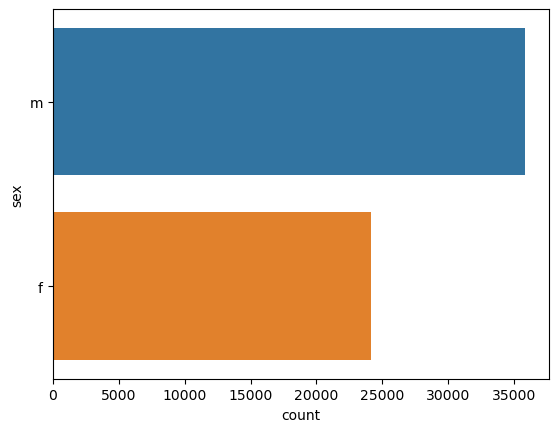

In [30]:
#sex
sns.countplot(data=data, y="sex")

<Axes: xlabel='count', ylabel='pets'>

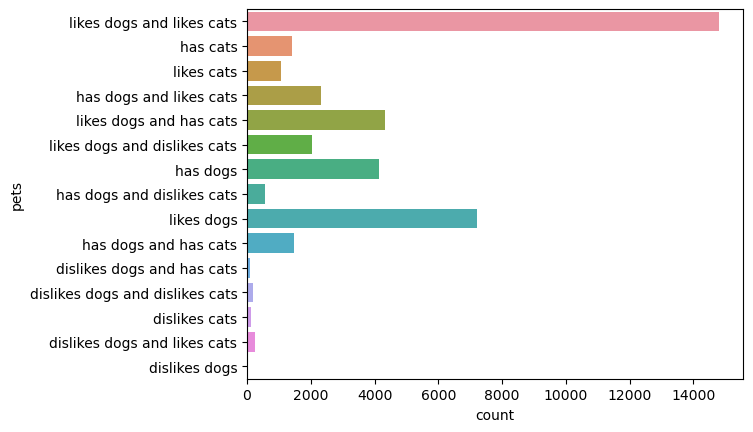

In [31]:
#pets
sns.countplot(data=data, y="pets")

<Axes: xlabel='count', ylabel='orientation'>

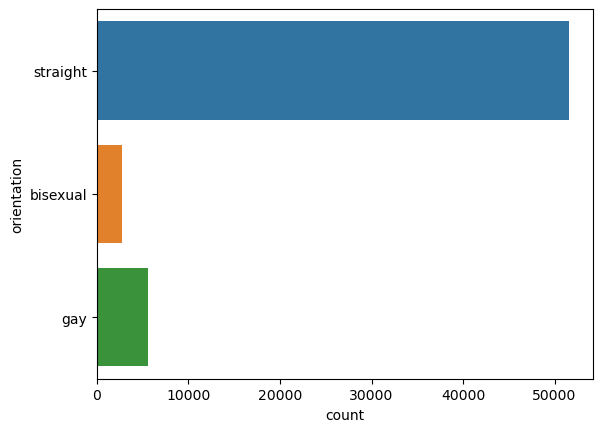

In [32]:
sns.countplot(data=data, y="orientation")

<Axes: xlabel='count', ylabel='job'>

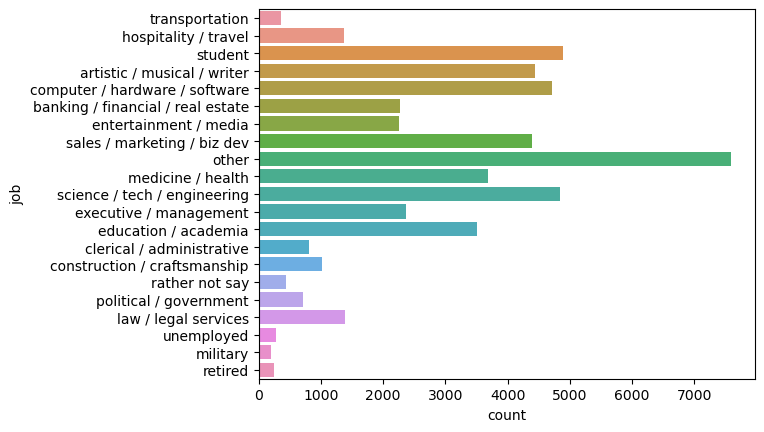

In [33]:
sns.countplot(data=data, y="job")

In [34]:
'''
age - no
height
body_type
smokes
status
drugs
religion
drinks
sex
pets
job
'''

'\nage - no\nheight\nbody_type\nsmokes\nstatus\ndrugs\nreligion\ndrinks\nsex\npets\njob\n'

In [35]:
##PRE-Process Data
#Columns being preprocessed

'''
age - no
height - no
body_type
smokes
status
drugs
religion
drinks
sex
pets
job
'''

columns = ['body_type','smokes','status','drugs', 'religionClean', 'drinks', 'sex', 'pets', 'job', 'signsCleaned']

newDf = data[columns].dropna()
print(newDf.shape)

(18397, 10)


In [36]:
#dummy variables for categories

cols = ['signsCleaned','body_type','smokes','status','drugs', 'religionClean', 'drinks', 'sex', 'pets', 'job']
df_two = pd.get_dummies(data=newDf,columns = cols[1:])

print(df_two.shape)



(18397, 79)


In [37]:
#SPLIT the DATA
col_length = len(df_two.columns)

#Y is the target column, X has the rest
X = df_two.iloc[:, 1:col_length]
Y = df_two.iloc[:, 0:1]
print(Y.head())
#Validation chunk size
val_size = 0.25

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 25)
#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

   signsCleaned
0        gemini
1        cancer
7   sagittarius
9        cancer
11          leo


In [38]:
#CLASSIFICATION

#Logistic
lr = LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\celly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Score the model on the training data
print(lr.score(X_train,Y_train))

# Score the model on the test data
print(lr.score(X_test,Y_test))

# Print the model coefficients
#print(lr.coef_)

0.11605626146633145
0.0766304347826087


In [40]:
print(lr.feature_names_in_)

['body_type_a little extra' 'body_type_athletic' 'body_type_average'
 'body_type_curvy' 'body_type_fit' 'body_type_full figured'
 'body_type_jacked' 'body_type_overweight' 'body_type_rather not say'
 'body_type_skinny' 'body_type_thin' 'body_type_used up' 'smokes_no'
 'smokes_sometimes' 'smokes_trying to quit' 'smokes_when drinking'
 'smokes_yes' 'status_available' 'status_married' 'status_seeing someone'
 'status_single' 'status_unknown' 'drugs_never' 'drugs_often'
 'drugs_sometimes' 'religionClean_agnosticism' 'religionClean_atheism'
 'religionClean_buddhism' 'religionClean_catholicism'
 'religionClean_christianity' 'religionClean_hinduism'
 'religionClean_islam' 'religionClean_judaism' 'religionClean_other'
 'drinks_desperately' 'drinks_not at all' 'drinks_often' 'drinks_rarely'
 'drinks_socially' 'drinks_very often' 'sex_f' 'sex_m'
 'pets_dislikes cats' 'pets_dislikes dogs'
 'pets_dislikes dogs and dislikes cats' 'pets_dislikes dogs and has cats'
 'pets_dislikes dogs and likes cats

In [44]:
#Try different model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [45]:
#KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [46]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.64      0.36      1128
       aries       0.28      0.49      0.35      1185
      cancer       0.30      0.42      0.35      1223
   capricorn       0.31      0.34      0.32      1109
      gemini       0.37      0.34      0.35      1339
         leo       0.39      0.31      0.34      1338
       libra       0.43      0.28      0.34      1253
      pisces       0.40      0.26      0.31      1152
 sagittarius       0.40      0.25      0.31      1197
     scorpio       0.43      0.25      0.31      1247
      taurus       0.40      0.23      0.29      1238
       virgo       0.42      0.23      0.30      1308

    accuracy                           0.33     14717
   macro avg       0.36      0.34      0.33     14717
weighted avg       0.37      0.33      0.33     14717



In [47]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.92      0.77      1128
       aries       0.67      0.88      0.76      1185
      cancer       0.71      0.85      0.78      1223
   capricorn       0.74      0.82      0.78      1109
      gemini       0.78      0.80      0.79      1339
         leo       0.81      0.79      0.80      1338
       libra       0.79      0.77      0.78      1253
      pisces       0.82      0.72      0.77      1152
 sagittarius       0.85      0.74      0.79      1197
     scorpio       0.87      0.70      0.77      1247
      taurus       0.88      0.70      0.78      1238
       virgo       0.92      0.68      0.78      1308

    accuracy                           0.78     14717
   macro avg       0.79      0.78      0.78     14717
weighted avg       0.80      0.78      0.78     14717



In [58]:
#Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. 
#Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

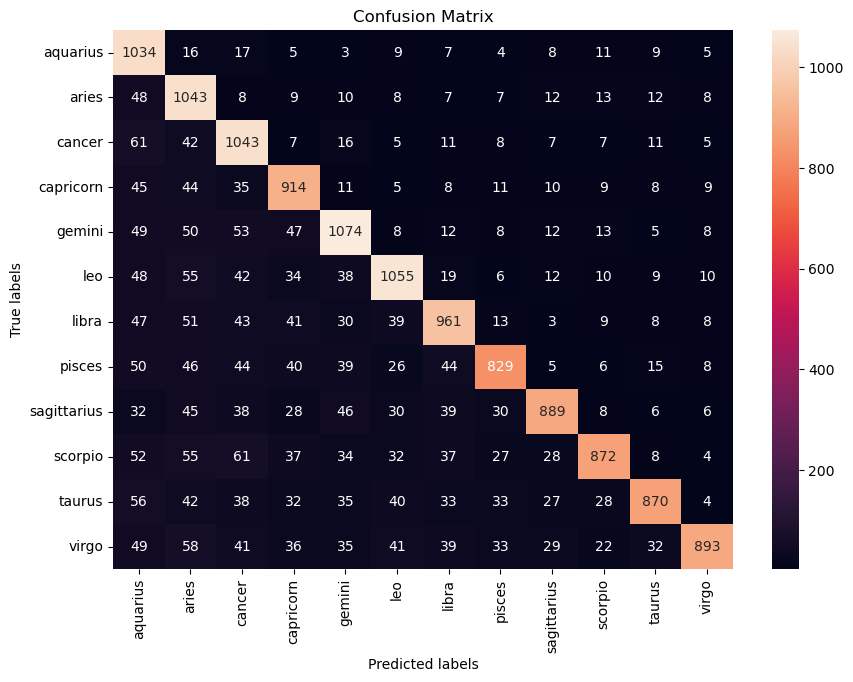

In [59]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [49]:
#in analyzing the depth of the decision tree. The tree depth is 54 branches. Which means the model overfitted to the data.
cart_model.get_depth()

54

In [53]:
#To make a point, a five fold cross validation is created with the same data. 
#The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08763587 0.09103261 0.08392796 0.07883112 0.08936459]
Baseline: 8.62% (0.44%)


In [55]:
#This situation I'm going to set max depth to prevent overfitting.
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [56]:
print(classification_report(Y_train, cart_predictions20))
#We now get an accuracy of 39% which is once again low

              precision    recall  f1-score   support

    aquarius       0.27      0.48      0.35      1128
       aries       0.49      0.43      0.46      1185
      cancer       0.25      0.52      0.33      1223
   capricorn       0.51      0.37      0.43      1109
      gemini       0.43      0.41      0.42      1339
         leo       0.55      0.38      0.45      1338
       libra       0.59      0.32      0.41      1253
      pisces       0.45      0.36      0.40      1152
 sagittarius       0.48      0.37      0.42      1197
     scorpio       0.39      0.38      0.38      1247
      taurus       0.38      0.40      0.39      1238
       virgo       0.40      0.33      0.36      1308

    accuracy                           0.39     14717
   macro avg       0.43      0.39      0.40     14717
weighted avg       0.43      0.39      0.40     14717



In [57]:
#If we check again with cross validation, the new model is still averaging ~8% which is not very good.
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.0872962  0.0767663  0.08494733 0.08460754 0.09310228]
Baseline: 8.53% (0.44%)


In [61]:
#So it seems that the knn_model might be the best model for OkCupid to use when users don't have their signs listed on their user profile. 
#By using the hold out or validation set, we get ~8% accuracy which is not very good.

knn_predictionsVal = knn_model.predict(X_test) 
print(classification_report(Y_test, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.10      0.21      0.13       315
       aries       0.08      0.15      0.11       306
      cancer       0.10      0.13      0.11       361
   capricorn       0.07      0.07      0.07       267
      gemini       0.09      0.09      0.09       306
         leo       0.07      0.06      0.06       318
       libra       0.06      0.04      0.05       282
      pisces       0.08      0.06      0.07       300
 sagittarius       0.07      0.05      0.06       274
     scorpio       0.07      0.04      0.05       299
      taurus       0.08      0.05      0.06       325
       virgo       0.11      0.06      0.08       327

    accuracy                           0.08      3680
   macro avg       0.08      0.08      0.08      3680
weighted avg       0.08      0.08      0.08      3680



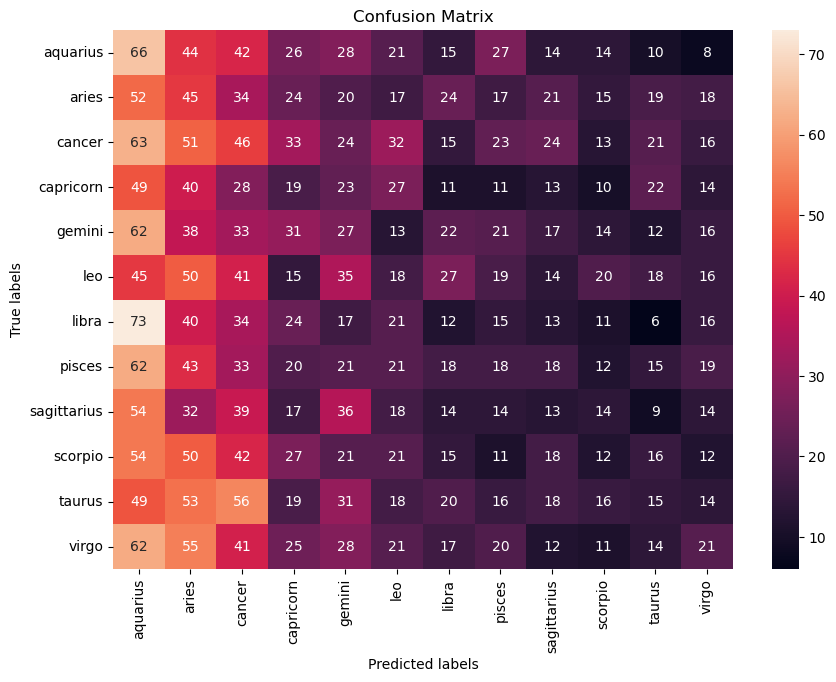

In [63]:
#In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, 
#but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct.

final_cm = confusion_matrix(Y_test, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);